In [1]:
import numpy as np
import pandas as pd

In [47]:
import lightkurve as lk
import warnings
warnings.filterwarnings('ignore')

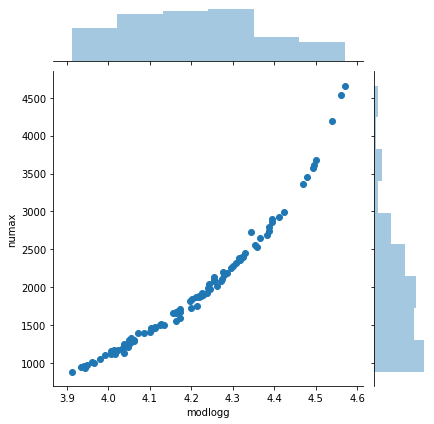

In [67]:
import seaborn as sns
sns.jointplot(ati.modlogg, ati.numax)

In [68]:
0.25*4500

1125.0

In [43]:
datalist = lk.search_lightcurvefile('HAT-P-11', cadence='short')

In [44]:
lc = datalist[:-2].download_all().stitch()

/usr/local/lib/python3.7/site-packages/lightkurve/collections.py:212: LightkurveWarning: Stitching a `LightCurveFileCollection` which contains both SAP and PDCSAP_FLUX. Plotting PDCSAP_FLUX. You can remove this warning by using `LightCurveFileCollection.PDCSAP_FLUX.stitch()`.
  LightkurveWarning)


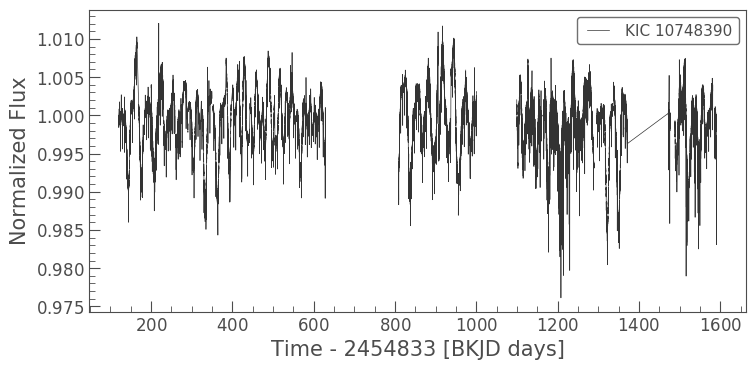

In [69]:
lc.plot()

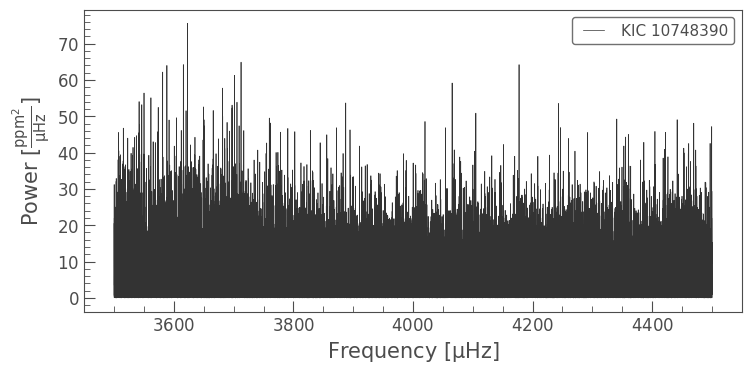

In [70]:
pg = lc.normalize(unit='ppm').remove_outliers().remove_nans().to_periodogram(normalization='psd', minimum_frequency=3500, maximum_frequency=4500)
pg.plot()

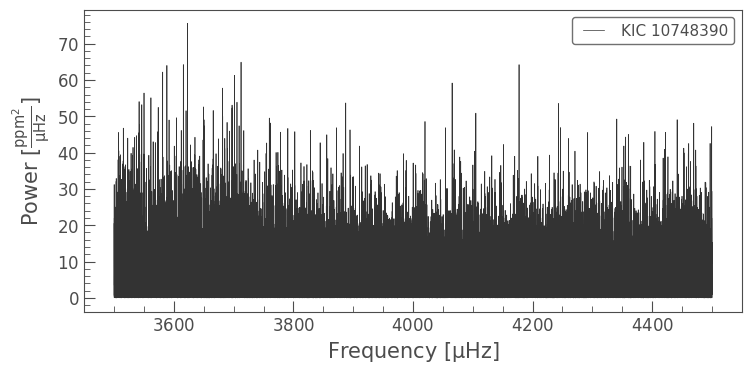

In [73]:
import astropy.units as u
ax = pg.plot()

In [74]:
seis = pg.flatten().to_seismology()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x13d370690>,
      dtype=object)

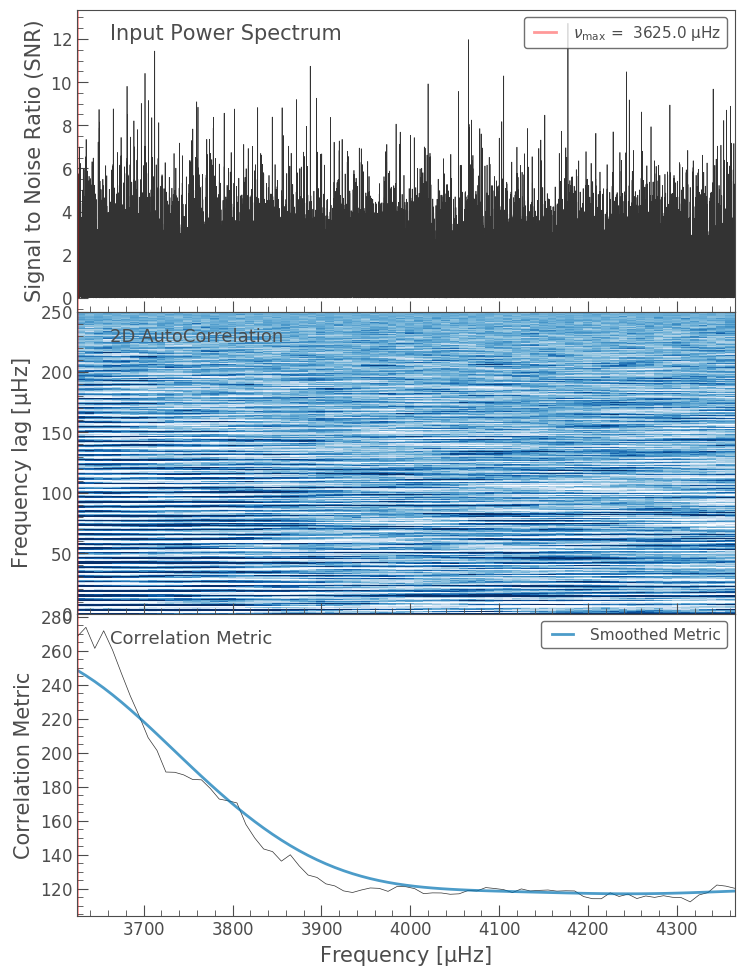

In [75]:
seis.estimate_numax()
seis.diagnose_numax()

In [2]:
ati = pd.read_csv('../data/atium.csv', index_col=0)

In [4]:
ati.head(5)

,KIC,Teff,age,dnu,eTeff,ednu,efeh,enumax,feh,loage,...,eV2,l_P,P,u_P,l_vsini,vsini,u_vsini,rhat_flag,eye_flag,ebprp
0,1435467,6326,3.0164,70.369,77,0.034,0.1,6.3,0.01,0.3513,...,0.059509,0.620728,6.541180,0.757775,0.672485,11.669772,0.724637,NaN,0,0.000777
1,2837475,6614,1.6270,75.729,77,0.041,0.1,8.2,0.01,0.1757,...,0.046604,0.154079,3.499114,0.172064,0.555348,22.351415,0.540087,NaN,0,0.000587
2,3427720,6045,2.2339,120.068,77,0.031,0.1,10.7,-0.06,0.2396,...,0.031153,11.821919,31.590512,10.236450,0.305072,1.473754,0.278017,NaN,0,0.000607
3,3456181,6384,2.0901,52.264,77,0.041,0.1,8.3,-0.15,0.1278,...,0.059344,2.790842,10.699926,2.006340,0.734456,8.634898,0.746225,NaN,0,0.000788
4,3632418,6193,2.6331,60.704,77,0.019,0.1,3.0,-0.12,0.1757,...,0.034584,0.729588,11.205550,0.624963,0.222056,8.216637,0.228105,NaN,0,0.000551


In [5]:
from astropy.table import Table
brett = Table.read('brett_kics.txt', format='ascii.ecsv').to_pandas()
brett.head(5)

,SmoothedAmp,Prot,Name,Assoc
0,0.0010,1.11,KIC 9716563,NGC 6811
1,0.0003,2.50,KIC 9716076,NGC 6811
2,0.0003,0.92,KIC 9715923,NGC 6811
3,0.0002,2.31,KIC 9716139,NGC 6811
4,0.0005,1.81,KIC 9655357,NGC 6811


In [27]:
kic = []
for idx in range(len(brett)):
    kic.append(int(brett['Name'].str.split('\s+')[idx][1]))

In [29]:
brett['KIC'] = kic

In [30]:
brett.head(5)

,SmoothedAmp,Prot,Name,Assoc,KIC
0,0.0010,1.11,KIC 9716563,NGC 6811,9716563
1,0.0003,2.50,KIC 9716076,NGC 6811,9716076
2,0.0003,0.92,KIC 9715923,NGC 6811,9715923
3,0.0002,2.31,KIC 9716139,NGC 6811,9716139
4,0.0005,1.81,KIC 9655357,NGC 6811,9655357


In [32]:
ati[ati['KIC'].isin(brett['KIC'])]

,KIC,Teff,age,dnu,eTeff,ednu,efeh,enumax,feh,loage,...,eV2,l_P,P,u_P,l_vsini,vsini,u_vsini,rhat_flag,eye_flag,ebprp


In [35]:
brett.KIC

0     9716563
1     9716076
2     9715923
3     9716139
4     9655357
       ...   
57    9655469
58    9655677
59    9715637
60    9776327
61    9896609
Name: KIC, Length: 62, dtype: int64

In [37]:
ati.KIC

0      1435467
1      2837475
2      3427720
3      3456181
4      3632418
        ...   
90    11295426
91    11401755
92    11807274
93    11853905
94    11904151
Name: KIC, Length: 95, dtype: int64